### ETE usage for phylogenetic or other tree analyses

Link: http://blog.genesino.com/2016/07/ete/

Mail: <chentong_biology@163.com>

In [1]:
# A virtual X-server XVFB is used in case you do not have X-server
from xvfbwrapper import Xvfb

vdisplay = Xvfb()
vdisplay.start()

# launch stuff inside virtual display here

#vdisplay.stop()

In [2]:
from ete3 import Tree, faces, TreeStyle, NodeStyle
from ete3 import ClusterTree, RectFace, AttrFace, ProfileFace, TextFace
from ete3.treeview.faces import add_face_to_node
import pandas as pd
import numpy as np
import colorsys

The most simple way of showing a tree.

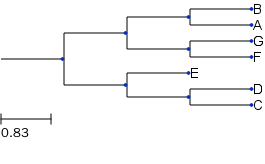

In [11]:
t = Tree()
t.populate(7,names_library=['A','B','C','D','E','F','G'])
## %%liline is used for showing plots in ipythonnotebook.
## t.render(file_name="tree.pdf") # will save tree into pdf file
t.render(file_name="%%inline")

Get the randomly generated tree in newick format and save to a string variable which can be read using `Tree()` function.

In [20]:
t_str = t.write(outfile=None, format=0)
t_str

'(((B:1,A:1)1:1,(G:1,F:1)1:1)1:1,(E:1,(D:1,C:1)1:1)1:1);'

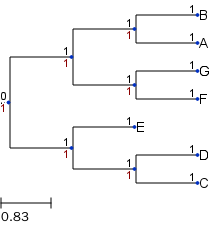

In [21]:
t = Tree(t_str)
ts = TreeStyle()
ts.show_leaf_name = True
ts.show_branch_length = True
ts.show_branch_support = True
t.render(file_name="%%inline", tree_style=ts)

Get the randomly generated tree in newick format and save to file which can also be read using `Tree()` function.

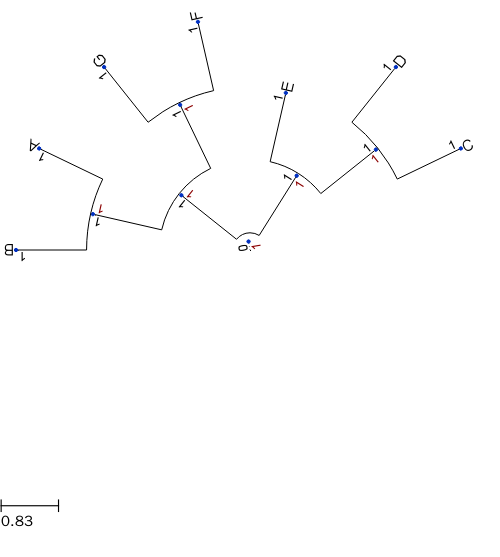

In [22]:
t.write(outfile="tree.nw", format=0)
t = Tree("tree.nw")
ts.mode = "c"
ts.arc_start = -180 # 0 degrees = 3 o'clock
ts.arc_span = 180
t.render(file_name="%%inline", w=500, tree_style=ts)

设置根节点、叶节点和中间节点的属性

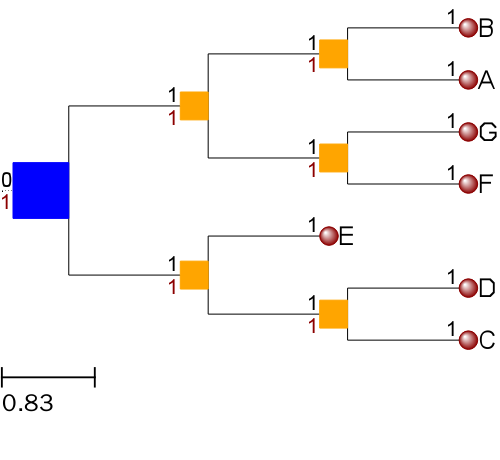

In [23]:
ts = TreeStyle()
ts.show_leaf_name = True
ts.show_branch_length = True
ts.show_branch_support = True

# Draws nodes as small red spheres of diameter equal to 10 pixels
for n in t.traverse():  # Traverse each node and set attribute for each type of nodes
    if n.is_leaf(): # Decide if leaf node
        nstyle = NodeStyle()
        nstyle["shape"] = "sphere"
        nstyle["size"] = 10
        nstyle["fgcolor"] = "darkred"
        n.set_style(nstyle)
    else:
        nstyle = NodeStyle()
        nstyle["shape"] = "square"
        nstyle["size"] = 15
        nstyle["fgcolor"] = "orange"
        n.set_style(nstyle)        

t.img_style["size"] = 30
t.img_style["fgcolor"] = "blue"
    
t.render(file_name="%%inline", w=500, tree_style=ts)

修改节点的名字

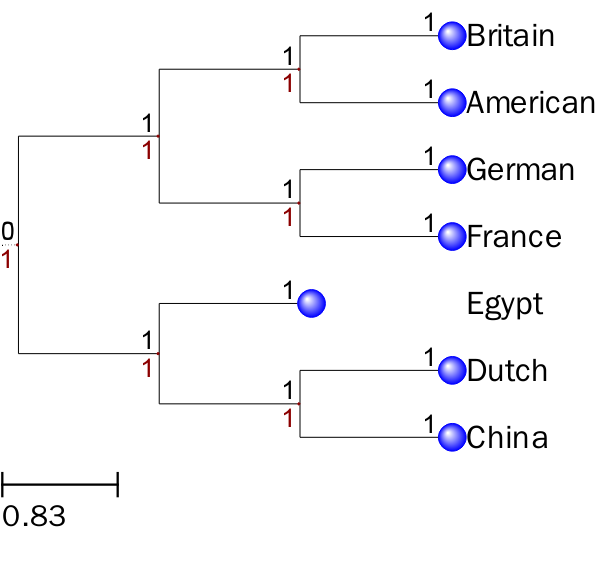

In [24]:
t = Tree(t_str)

nameMap = {'A': 'American', 'B': 'Britain', 'C':'China', 
           'D':'Dutch', 'E':'Egypt','F':'France','G':'German'}

ts = TreeStyle()
ts.show_leaf_name = False
ts.show_branch_length = True
ts.show_branch_support = True

# Creates my own layout function. I will use all previously created
# faces and will set different node styles depending on the type of
# node.
def mylayout(node):   
    # If node is a leaf, add the nodes name and a its scientific
    # name
    if node.is_leaf():
        # We can also create faces on the fly
        newName = nameMap.get(node.name, node.name)
        newNameFace = faces.TextFace(newName)
        faces.add_face_to_node(newNameFace, node, column=1, aligned=True)

        # Sets the style of leaf nodes
        node.img_style["size"] = 12
        node.img_style["shape"] = "sphere"
        node.img_style["fgcolor"] = "blue"
    #If node is an internal node
    else:
        # Sets the style of internal nodes
        node.img_style["size"] = 1
        node.img_style["shape"] = "circle"
        node.img_style["fgcolor"] = "darkred"

ts.layout_fn = mylayout

t.img_style["size"] = 30
t.img_style["fgcolor"] = "black"
    
t.render(file_name="%%inline", w=600, tree_style=ts)

不同的节点设置不同的背景色，树枝的颜色

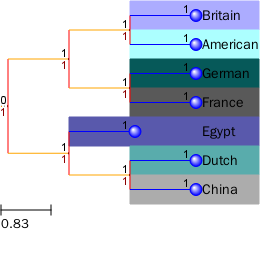

In [35]:
t = Tree(t_str)

nameMap = {'A': 'American', 'B': 'Britain', 'C':'China', 
           'D':'Dutch', 'E':'Egypt','F':'France','G':'German'}

colorMap = { 'American': '#ACFFFF',
             'Britain': '#ACACFF',
             'China': '#ACACAC',
             'Dutch': '#59ACAC',
             'Egypt': '#5959AC',
             'France': '#595959',
             'German': '#065959'}

ts = TreeStyle()
ts.show_leaf_name = False
ts.show_branch_length = True
ts.show_branch_support = True

# Creates my own layout function. I will use all previously created
# faces and will set different node styles depending on the type of
# node.
def mylayout(node):   
    #Change branch color
    node.img_style["hz_line_color"] = 'orange'  # change horizontal branch color 
    node.img_style["vt_line_color"] = 'red' # Change vertical branch color
    
    # If node is a leaf, add the nodes name and a its scientific
    # name
    if node.is_leaf():
        # We can also create faces on the fly
        newName = nameMap.get(node.name, node.name)
        newNameFace = faces.TextFace(newName)
        faces.add_face_to_node(newNameFace, node, column=1, aligned=True)

        # Sets the style of leaf nodes
        node.img_style["size"] = 12
        node.img_style["shape"] = "sphere"
        node.img_style["fgcolor"] = "blue"
        node.img_style["bgcolor"] = colorMap[newName]
        
        node.img_style["hz_line_color"] = 'blue'  # change branch color 
    #If node is an internal node
    else:
        # Sets the style of internal nodes
        node.img_style["size"] = 1
        node.img_style["shape"] = "circle"
        node.img_style["fgcolor"] = "darkred"

ts.layout_fn = mylayout

t.img_style["size"] = 30
t.img_style["fgcolor"] = "black"
    
t.render(file_name="%%inline",tree_style=ts)

#### 默认树+热图（自定义颜色+列名字）

自定义热图函数，同时该函数也支持替换或新增节点的名字

In [39]:
nameFace = AttrFace("name", fsize=12)

def setup_heatmap(tree, tree_style, header, center_value=0.0, nameMap ={}, nameLabel = '',
                  color_up=0.7, color_down=0.2, color_center="white"):
    DEFAULT_COLOR_SATURATION = 0.5
    BASE_LIGHTNESS = 0.7
    def gradient_color(value, max_value, saturation=0.5, hue=0.1):    
        def rgb2hex(rgb):
            return '#%02x%02x%02x' % rgb
        def hls2hex(h, l, s):
            return rgb2hex( tuple(map(lambda x: int(x*255), 
                                      colorsys.hls_to_rgb(h, l, s))))
    
        lightness = 1 - (value * BASE_LIGHTNESS) / max_value
        return hls2hex(hue, lightness, DEFAULT_COLOR_SATURATION)


    # Calculate max gradient value from the ClusterTree matrix
    maxv = abs(center_value - tree.arraytable._matrix_max)
    minv = abs(center_value - tree.arraytable._matrix_min)
    if center_value <= tree.arraytable._matrix_min:
        MAX_VALUE = minv + maxv
    else:
        MAX_VALUE = max(maxv, minv)
        
    # Add heatmap colors to tree
    cols_add_before_heat = 0
    if nameMap:
        cols_add_before_heat = 1
    for lf in tree:
        if nameMap:
            longNameFace = faces.TextFace(nameMap.get(lf.name, lf.name))
            lf.add_face(longNameFace, column=0, position="aligned")
            
        for i, value in enumerate(getattr(lf, "profile", [])):
            if value > center_value:
                color = gradient_color(abs(center_value - value), MAX_VALUE, 
                                       hue=color_up)
            elif value < center_value:
                color = gradient_color(abs(center_value - value), MAX_VALUE, 
                                       hue=color_down)
            else:
                color = color_center
            lf.add_face(RectFace(20, 20, color, color), position="aligned", 
                        column=i+cols_add_before_heat)
            # Uncomment to add numeric values to the matrix
            #lf.add_face(TextFace("%0.2f "%value, fsize=5), position="aligned", column=i)
        lf.add_face(nameFace, column=i+cols_add_before_heat+1, position="aligned")
        
    if nameMap and nameLabel:
        nameF = TextFace(nameLabel, fsize=7)
        #nameF.rotation = -90
        tree_style.aligned_header.add_face(nameF, column=0)
    # Add header 
    for i, name in enumerate(header):
        nameF = TextFace(name, fsize=7)
        nameF.rotation = -90
        tree_style.aligned_header.add_face(nameF, column=i+cols_add_before_heat)
 #-------------END setup_heatmap----------------------------------------------        

读入矩阵 （可把文后的测试矩阵存储到文件中读入）

矩阵需满足三个条件：
* 矩阵为TAB键分割，第一行是每列的名字
* 矩阵每一行第一列为行名字，与树的节点对应
* 矩阵可以存储与一个文件中，也可以是如下的字符串

In [43]:
data = pd.read_table("matrix", header=0, index_col=0)
data.index.name = "#Names"  #修改第一行的名字使其符合ETE的要求
data_mat = data.to_csv(None, sep="\t", float_format="%.2f")
header = list(data.columns.values)  #获取列的名字用于标记

In [41]:
data

,col1,col2,col3,col4,col5,col6,col7
#Names,,,,,,,
A,-1.23,-0.81,1.79,0.78,-0.42,-0.69,0.58
B,-1.76,-0.94,1.16,0.36,0.41,-0.35,1.12
C,-2.19,0.13,0.65,-0.51,0.52,1.04,0.36
D,-1.22,-0.98,0.79,-0.76,-0.29,1.54,0.93
E,-1.47,-0.83,0.85,0.07,-0.81,1.53,0.65
F,-1.04,-1.11,0.87,-0.14,-0.80,1.74,0.48
G,-1.57,-1.17,1.29,0.23,-0.20,1.17,0.26


In [42]:
data_mat

'#Names\tcol1\tcol2\tcol3\tcol4\tcol5\tcol6\tcol7\nA\t-1.23\t-0.81\t1.79\t0.78\t-0.42\t-0.69\t0.58\nB\t-1.76\t-0.94\t1.16\t0.36\t0.41\t-0.35\t1.12\nC\t-2.19\t0.13\t0.65\t-0.51\t0.52\t1.04\t0.36\nD\t-1.22\t-0.98\t0.79\t-0.76\t-0.29\t1.54\t0.93\nE\t-1.47\t-0.83\t0.85\t0.07\t-0.81\t1.53\t0.65\nF\t-1.04\t-1.11\t0.87\t-0.14\t-0.80\t1.74\t0.48\nG\t-1.57\t-1.17\t1.29\t0.23\t-0.20\t1.17\t0.26\n'

In [44]:
header

['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7']

调用函数绘制热图

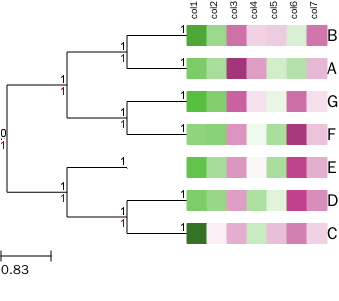

In [45]:
t = ClusterTree(t_str, data_mat)

ts = TreeStyle()
ts.show_leaf_name = False
ts.show_branch_length = True
ts.show_branch_support = True

setup_heatmap(t, ts, header, center_value=0, color_up=0.9, color_down=0.3, color_center="white")

t.render(file_name="%%inline", tree_style=ts)

绘制热图时修改Layout

In [46]:
def mylayout_only(node):   
    #Change branch color
    node.img_style["hz_line_color"] = 'orange'  # change horizontal branch color 
    node.img_style["vt_line_color"] = 'red' # Change vertical branch color
    
    # If node is a leaf, add the nodes name and a its scientific
    # name
    if node.is_leaf():
        newName = nameMap.get(node.name)
        node.img_style["size"] = 12
        node.img_style["shape"] = "sphere"
        node.img_style["fgcolor"] = "blue"
        node.img_style["bgcolor"] = colorMap[newName]        
        node.img_style["hz_line_color"] = 'blue'  # change branch color 
    #If node is an internal node
    else:
        # Sets the style of internal nodes
        node.img_style["size"] = 1
        node.img_style["shape"] = "circle"
        node.img_style["fgcolor"] = "darkred"

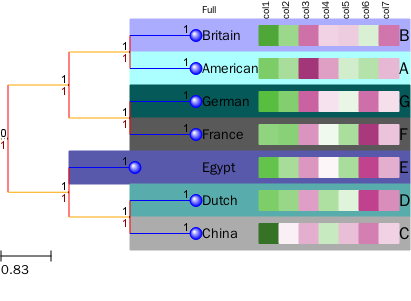

In [47]:
t = ClusterTree(t_str, data_mat)

ts = TreeStyle()
ts.show_leaf_name = False
ts.show_branch_length = True
ts.show_branch_support = True
ts.layout_fn = mylayout_only

setup_heatmap(t, ts, header, center_value=0, color_up=0.9, color_down=0.3, 
              color_center="white", nameMap=nameMap, nameLabel="Full")

t.render(file_name="%%inline", tree_style=ts)

测试矩阵

In [37]:
## 矩阵为TAB键分割
## 矩阵每一行第一列为行名字，与树的节点对应
## 矩阵可以存储与一个文件中，也可以是如下的字符串
matrix = """
#Names\tcol1\tcol2\tcol3\tcol4\tcol5\tcol6\tcol7
A\t-1.23\t-0.81\t1.79\t0.78\t-0.42\t-0.69\t0.58
B\t-1.76\t-0.94\t1.16\t0.36\t0.41\t-0.35\t1.12
C\t-2.19\t0.13\t0.65\t-0.51\t0.52\t1.04\t0.36
D\t-1.22\t-0.98\t0.79\t-0.76\t-0.29\t1.54\t0.93
E\t-1.47\t-0.83\t0.85\t0.07\t-0.81\t1.53\t0.65
F\t-1.04\t-1.11\t0.87\t-0.14\t-0.80\t1.74\t0.48
G\t-1.57\t-1.17\t1.29\t0.23\t-0.20\t1.17\t0.26
"""

产生颜色的辅助函数，给定一个列表，这个函数会自动返回一个字典包含每个字段对应的颜色。

In [29]:
def hex2rgb(hexcolor):
    return [(hexcolor>>16) & 0xff, (hexcolor>>8) & 0xff, hexcolor & 0xff]

def rgb2hex(rgbcolor):
    r, g, b = rgbcolor
    rgb = hex((r << 16) + (g << 8) +b)[2:].upper()
    zero = '0'* (6-len(rgb))
    return '#'+zero+rgb
#----------------------------------
def generateColor(labelL):
    labelL = list(set(labelL))
    labelL.sort()
    colorD = {}
    
    r = 255
    g = 255
    b = 255
    len_label = int(len(labelL) / 3 + 1)
    step = int(250 / len_label)
    
    cnt = 1
    for labels in labelL:
        if cnt % 3 == 1:
            r = r - step 
        elif cnt % 3 == 2:
            g = g -step
        else:
            b = b - step
        cnt += 1
        color = rgb2hex([r, g, b])
        colorD[labels] = color
    return colorD


In [30]:
clan_colorD = generateColor(nameMap.values())
clan_colorD

{'American': '#ACFFFF',
 'Britain': '#ACACFF',
 'China': '#ACACAC',
 'Dutch': '#59ACAC',
 'Egypt': '#5959AC',
 'France': '#595959',
 'German': '#065959'}

带有Support value的Newick树，供测试不同的属性使用

In [31]:
nw = """
(((Dre:0.008339,Dme:0.300613)1.000000:0.596401,
(Cfa:0.640858,Hsa:0.753230)1.000000:0.182035)1.000000:0.106234,
((Dre:0.271621,Cfa:0.046042)1.000000:0.953250,
(Hsa:0.061813,Mms:0.110769)1.000000:0.204419)1.000000:0.973467);

Turn off virtual X-server

In [ ]:
vdisplay.stop()

### References

* ETE tutorial <http://etetoolkit.org/docs/latest/tutorial/index.html>
* ETE googlegroup <https://groups.google.com/d/topic/etetoolkit/pXr4B71Ozt0> 
* Vdisplay <http://stackoverflow.com/questions/6183276/how-do-i-run-selenium-in-xvfb> 